**CONSIGNA**
1. Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


En el siguiente fragmeto se cargan las imagenes de Will (original y a comparar)

In [1]:
import os
filenames = os.listdir("img")
filenames.sort()
print(filenames)

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


In [3]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    suma = 0

    for x in range(largo):
        for y in range(ancho):
            if cuadrada:
                suma += int(imagen[x][y]) * int(imagen[x][y])
            else:
                suma += int(imagen[x][y])

    return float(suma)/(largo*ancho)

In [4]:
def desvio(imagen, media_imagen):
    """
    desvio = sqrt(<x2> - <x>2)
    """
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    return desvio

In [5]:
def correlacion_cruzada(imagen_a,imagen_b):
    if(len(imagen_a)!= len(imagen_b) or len(imagen_a[0]) != len(imagen_b[0])):
        return

    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])

    return  float(suma_ambos)/(largo*ancho)

In [6]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

In [2]:
import os
import imageio

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

In [8]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1


Procesado imagen 1 ...
Procesado imagen 2 ...
Procesado imagen 3 ...
Procesado imagen 4 ...
Procesado imagen 5 ...


In [9]:
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0])

Imagen 1
Imagen 2
Imagen 3
Imagen 5
Imagen 4


Populating the interactive namespace from numpy and matplotlib


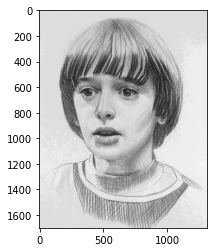

In [10]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(will_original,cmap='gray',vmin=0,vmax=255)
plt.show()

2- Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

In [3]:
def distribucion_intensidad(imagen):
    #posible mejora, en ves de usar un arreglo usar otra estructura
    #como un mapa o algo asi porque hay muchos valores de intesidad 
    #que no se usan
    dist = {} #esto nose si se hace asi -> joya
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=(float)(dist[key]/(largo*ancho))
    return dist


distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad(will_fotos_busqueda[0])
distribucion_policia = distribucion_intensidad(will_policia)

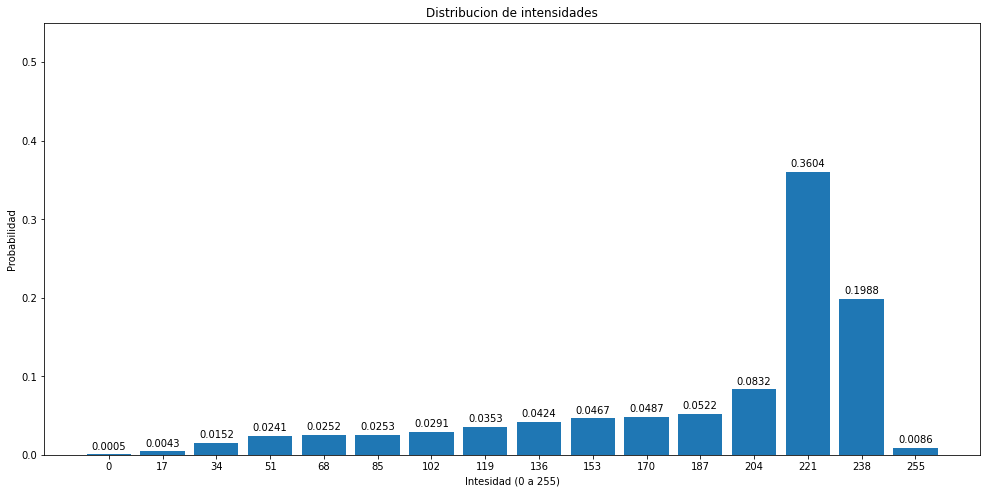

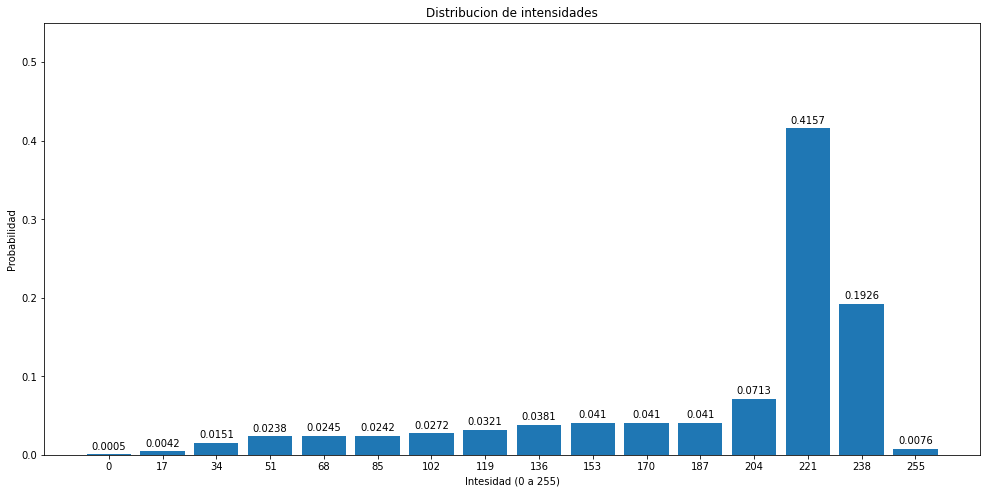

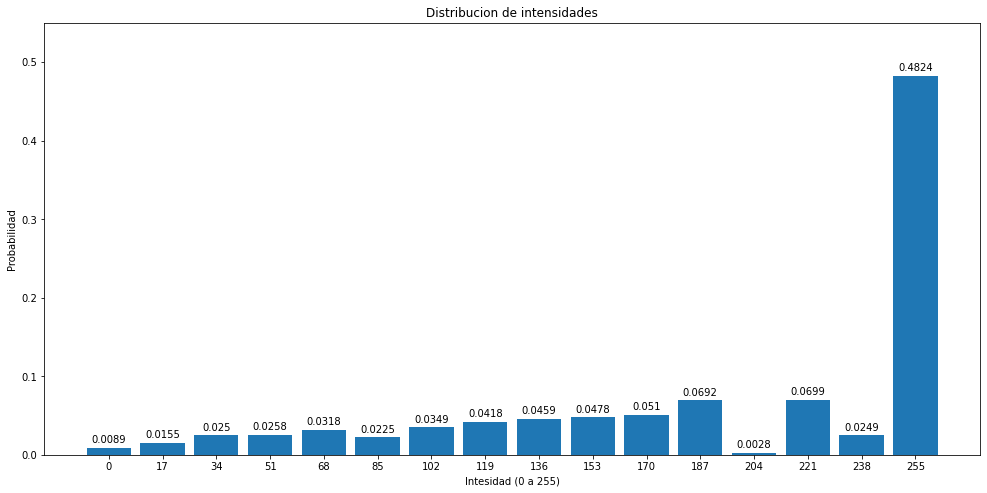

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,6)

# funcion para generar histograma a partir de una distribucion
def generar_histograma(distribucion):
    valores = list(distribucion.values())
    intensidades = list(distribucion.keys())

    # configuracion del plotting
    figura = plt.figure()
    ejes = figura.add_axes([0,0,1,1])
    histograma = ejes.bar(intensidades,valores,width=14)
    plt.xticks(intensidades,intensidades)

    # titulos y labels
    ejes.set_title('Distribucion de intensidades')
    ejes.set_xlabel('Intesidad (0 a 255)')
    ejes.set_ylabel('Probabilidad')
    
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas
    plt.autoscale(False)

    # Funcion para poner el label arriba de cada barrita
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round((float)(rect.get_height()),4)
            ejes.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=10)

    # generar autolabels
    autolabel(histograma)

    # Mostrar el grafico
    plt.show()

generar_histograma(distribucion_original)
generar_histograma(distribucion_parecida)
generar_histograma(distribucion_policia)


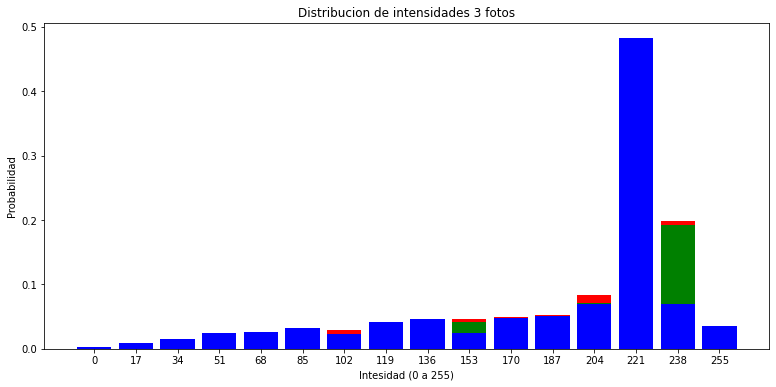

In [6]:
import matplotlib.pyplot as plt
'''
x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

'''

intensidades = list(distribucion_original.keys())
valores1 = list(distribucion_original.values())
valores2 = list(distribucion_parecida.values())
valores3 = list(distribucion_policia.values())


# configuracion del plotting
ejes = plt.subplot(111)
ejes.bar(intensidades,valores1,width=14,color='r',align='center',label="Foto original")
ejes.bar(intensidades,valores2,width=14,color='g',align='center',label="Foto mas parecida")
ejes.bar(intensidades,valores3,width=14,color='b',align='center',label="Foto del policia")
plt.xticks(intensidades,intensidades)

# titulos y labels
ejes.set_title('Distribucion de intensidades 3 fotos')
ejes.set_xlabel('Intesidad (0 a 255)')
ejes.set_ylabel('Probabilidad')

# Mostrar el grafico
plt.show()

In [7]:
import math

def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    return math.sqrt(varianza)

distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")
    

Dist original
189.9449923664122
55.70177307571604
************
Dist parecida
192.4244961832061
55.15561366734102
************
Dist policia
195.15137404580153
73.83400301980652
************


3. Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original). Con dicho algoritmo codificador:
    - a) Comprimir con Huffman semi-estático la imagen original.
    - b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
    - c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
    - d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para  la propia imagen. Comparar con el resultado del inciso anterior.
    - e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d).
Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [8]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter

#Devuelve los dos nodos de menor probabilidad
def get_mas_chicos(arr):
  nodo1 = arr[0] # el valor mas chico
  nodo2 = arr[1] # el segundo mas chico
  i = 2
  while i < len(arr):
    if arr[i].prob < nodo1.prob :
      nodo2 = nodo1
      nodo1 = arr[i]
    elif arr[i].prob < nodo2.prob :
      nodo2 = arr[i]
    i += 1
  return nodo1,nodo2

#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
  for hoja in nodo1.leaves :
    codigos[hoja.name] = '0' + codigos[hoja.name]
  for hoja in nodo2.leaves :
    codigos[hoja.name] = '1' +codigos[hoja.name]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
  nodos.remove(nodo1)
  nodos.remove(nodo2)
  grupo = Node(nodo1.name + nodo2.name,prob=nodo1.prob + nodo2.prob)
  nodo1.parent = grupo
  nodo2.parent = grupo
  return grupo

#Genera el codigo de huffman y su arbol correspondiente
def generar_codigo_huffman(dist):
  nodos = []
  codigos = {}
  for key in dist:
    nodos.append(Node(key,prob=dist[key]))
    codigos[key] = ""
  while len(nodos) != 1:
    nodo1, nodo2 = get_mas_chicos(nodos)
    grupo = fusionar_nodos(nodos,nodo1,nodo2)
    actualizar_codigos(codigos,nodo1,nodo2)
    nodos.append(grupo)
  return codigos,nodos[0]

In [9]:
codigos_will_original, arbol_will_original = generar_codigo_huffman(distribucion_original)

for pre, _, node in RenderTree(arbol_will_original):
    if node.is_root:
        print(pre)
    else:
        bigger = 0
        for s in node.siblings:
            if s.name < node.name:
                bigger = 1
        if node.is_leaf:
            print("%s%s=>%s | %s" % (pre, bigger, node.name, node.prob))
        else:
            print("%s%s" % (pre,bigger))
# graphviz needs to be installed for the next line!
#DotExporter(arbol_will_original).to_picture("udo.png")


├── 1
│   ├── 0
│   │   ├── 0
│   │   │   ├── 0=>136 | 0.04238796587337225
│   │   │   └── 1=>153 | 0.04666771441400988
│   │   └── 0
│   │       ├── 1=>170 | 0.048701841041760216
│   │       └── 0
│   │           ├── 0=>51 | 0.02414683430624158
│   │           └── 1=>68 | 0.025161652447238437
│   └── 1
│       ├── 1
│       │   ├── 0=>187 | 0.05222900763358779
│       │   └── 1
│       │       ├── 0=>85 | 0.025297709923664122
│       │       └── 1
│       │           ├── 1
│       │           │   ├── 0
│       │           │   │   ├── 0=>0 | 0.00047373147732375395
│       │           │   │   └── 1=>17 | 0.004271216883700045
│       │           │   └── 1=>255 | 0.008626852267624607
│       │           └── 0=>34 | 0.015194881005837449
│       └── 0
│           ├── 1
│           │   ├── 0=>102 | 0.029128423888639426
│           │   └── 1=>119 | 0.03527929950606197
│           └── 0=>204 | 0.08321239335428827
└── 0
    ├── 0=>221 | 0.360416255051639
    └── 1=>238 | 0.19880422092501124


In [10]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
    # vamos a ir armando una lista de bytes (que vamos a representar con chars, ya
    # que este tipo de dato tiene 8 bits)
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        byte = chr(int(''.join([str(bit) for bit in ocho_bits]), 2))
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # imprimo mi representacion en chars
    print(lista_de_bytes)
    # la convierto en un único string
    data_en_un_unico_string = ''.join(lista_de_bytes)

    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'w') as f:
        f.write(data_en_un_unico_string)
        return True
    return False

In [11]:
def leer_bits_de_archivo(nombre_archivo):
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        print('Bits en forma correcta {}'.format(bits))
        result.extend([int(b) for b in bits])
        print('---------')

    print(result)
    return result

In [12]:
print(codigos_will_original)

def generar_codigo(imagen,codigo):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigo[imagen[i][j]]:
                codificacion.append(c)
    return codificacion

codificacion_original = generar_codigo(will_original, codigos_will_original)

{221: '10', 238: '11', 204: '0111', 187: '0100', 170: '0010', 153: '0001', 136: '0000', 119: '01101', 255: '0101101', 102: '01100', 85: '01010', 68: '00111', 51: '00110', 34: '010111', 17: '01011001', 0: '01011000'}


In [13]:
guardar_bits_a_archivo(codificacion_original, "original.teoinfo")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



True

In [15]:
leer_bits_de_archivo("original.teoinfo")

FileNotFoundError: [Errno 2] No such file or directory: 'mi_archivo.teoinfo'